In [1]:
import pymysql
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

db = pymysql.connect(host = "cdb-r2g8flnu.bj.tencentcdb.com", port = 10209, user = "dase2020", password = "dase2020", database = "dase_intro_2020")
cursor = db.cursor()

In [2]:
#爬取所有数据行
sql = "SELECT * FROM SH_Grade;"
cursor.execute(sql)
result = cursor.fetchall()
title = ['id','StuId','class','Sex',
         'CHI611','MATH611','ENG611','CHI612','MATH612','ENG612','CHI621','MATH621','ENG621','CHI622','MATH622','ENG622',
         'CHI711','MATH711','ENG711','CHI712','MATH712','ENG712','CHI721','MATH721','ENG721','CHI722','MATH722','ENG722',
         'CHI811','MATH811','ENG811','PHY811','CHI812','MATH812','ENG812','PHY812','CHI821','MATH821','ENG821','PHY821','CHI822','MATH822','ENG822','PHY822',
         'CHI911','MATH911','ENG911','PHY911','CHE911','CHI912','MATH912','ENG912','PHY912','CHE912',
         'CHI921','MATH921','ENG921','PHY921','CHE921']

with open('D:/intro/SH_Grade.csv', 'w', encoding='UTF8', newline='') as f: #新建一个csv文件
    writer = csv.writer(f)
    writer.writerow(title)
    for record in result:
        i = 0
        for num in record:
            num = str(num)
            f.write(num)
            if i == 1:
                f.write(",")
                temp = list(num)
                f.write(temp[0])
            if i < 57:
                f.write(",")
            i += 1
        f.write("\n")

In [3]:
#去除重复行
f = open('D:/intro/SH_Grade.csv','r',encoding='utf-8')
data = pd.read_csv(f, header = 0)
f.close()
print(data.shape[0])

data1 = data.drop_duplicates(subset=['StuId'])  # 只要某两行数据的StuId字段相同，就认为它们是重复的数据行
print(data1.shape[0])

252
243


In [4]:
#剔除大于等于12个字段为空的数据行，并报告经处理前后的数据条目数量
data2 = np.array(data1)

for i in range(0, 243):
    for j in range(0, 59):
        if data2[i][j] == 'None':
            data2[i][j] = np.nan

data2_with_name = pd.DataFrame(data2, columns = ['id','StuId','class','Sex',
         'CHI611','MATH611','ENG611','CHI612','MATH612','ENG612','CHI621','MATH621','ENG621','CHI622','MATH622','ENG622',
         'CHI711','MATH711','ENG711','CHI712','MATH712','ENG712','CHI721','MATH721','ENG721','CHI722','MATH722','ENG722',
         'CHI811','MATH811','ENG811','PHY811','CHI812','MATH812','ENG812','PHY812','CHI821','MATH821','ENG821','PHY821','CHI822','MATH822','ENG822','PHY822',
         'CHI911','MATH911','ENG911','PHY911','CHE911','CHI912','MATH912','ENG912','PHY912','CHE912',
         'CHI921','MATH921','ENG921','PHY921','CHE921'])
            
data2 = pd.DataFrame(data2)
print(data1.shape[0])
data3 = data2_with_name.dropna(thresh = 48) #仅保留完整数据项>=48个的数据行，其余数据行将被剔除
print(data3.shape[0])

243
189


In [5]:
# 对于仍空缺的数据项，请在任务3的基础上做如下处理：性别用上一条数据行的性别填充，成绩用该次该门考试的中位数填充
data3a = data2.dropna(thresh = 48)
data4 = np.array(data3a)

#寻找中位数，抛弃NaN
mid = data3a.median(skipna = True)
#print(mid)

for i in range(0, 189):
    for j in range(3, 59):
        if data4[i][j] is np.nan:
            if j == 3:
                data4[i][j] = data4[i - 1][j]
            else:
                data4[i][j] = float(mid[j])
                
for k in range(4, 59):
    for t in range(0, 189):
        data4[t][k] = float(data4[t][k])

data4 = pd.DataFrame(data4)

#data4.to_csv('data4.csv', index = False)

C:\Users\86155\AppData\Local\Temp\ipykernel_99528\978477406.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mid = data3a.median(skipna = True)


In [6]:
# 将部分非百分制计分的列转换为百分制计分
# 8年级第2学期的期末考试中，语数英为120分制；旧制中考（语数英满分150分，物理满分90分，化学60分）

# 查看每列最大值，确定不是百分制考试的科目
data5 = np.array(data4)
max_score = data4.max()
print(max_score)

for i in range(189):
    data5[i][40] = round((data5[i][40] / 120) * 100, 0)
    data5[i][41] = round((data5[i][41] / 120) * 100, 0)
    data5[i][42] = round((data5[i][42] / 120) * 100, 0)
    for j in range(0, 3):
        data5[i][44 + j * 5] = round(data5[i][44 + j * 5] / 150 * 100, 0)
        data5[i][45 + j * 5] = round(data5[i][45 + j * 5] / 150 * 100, 0)
        data5[i][46 + j * 5] = round(data5[i][46 + j * 5] / 150 * 100, 0)
        if j != 1:
            data5[i][47 + j * 5] = round(data5[i][47 + j * 5] / 90 * 100, 0)
            data5[i][48 + j * 5] = round(data5[i][48 + j * 5] / 60 * 100, 0)

data6 = pd.DataFrame(data5, columns = ['id','StuId','class','Sex',
         'CHI611','MATH611','ENG611','CHI612','MATH612','ENG612','CHI621','MATH621','ENG621','CHI622','MATH622','ENG622',
         'CHI711','MATH711','ENG711','CHI712','MATH712','ENG712','CHI721','MATH721','ENG721','CHI722','MATH722','ENG722',
         'CHI811','MATH811','ENG811','PHY811','CHI812','MATH812','ENG812','PHY812',
        'CHI821','MATH821','ENG821','PHY821','CHI822','MATH822','ENG822','PHY822',
         'CHI911','MATH911','ENG911','PHY911','CHE911','CHI912','MATH912','ENG912','PHY912','CHE912',
         'CHI921','MATH921','ENG921','PHY921','CHE921'])

0       243
1       G30
2         G
3         M
4      88.0
5     100.0
6      99.0
7      89.0
8     100.0
9     100.0
10     93.0
11    100.0
12    100.0
13     90.0
14    100.0
15    100.0
16     88.0
17    100.0
18     99.0
19     94.0
20    100.0
21     99.0
22     89.0
23     98.0
24     99.0
25     88.0
26    100.0
27     99.0
28     93.0
29    100.0
30    100.0
31    100.0
32     96.0
33    100.0
34    100.0
35     98.0
36     89.0
37     96.0
38     98.0
39    100.0
40    108.0
41    120.0
42    119.0
43    100.0
44    140.0
45    150.0
46    145.0
47     90.0
48     59.0
49    139.0
50    150.0
51    147.5
52     98.0
53     98.0
54    134.0
55    150.0
56    147.5
57     90.0
58     58.0
dtype: object


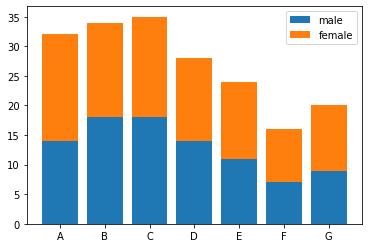

In [7]:
# 绘制各班男女人数的叠加条形图
male = np.zeros(7, dtype = int)
female = np.zeros(7, dtype = int)
num = data6.groupby(['class', 'Sex'])['class'].count()
num1 = np.array(num)
for i in range(7):
    male[i] = num1[2 * i]
    female[i] = num1[2 * i + 1]
index = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G'])

plt.bar(index, male, label = 'male')
plt.bar(index, female, bottom = male, label = 'female')
plt.legend()
plt.show()

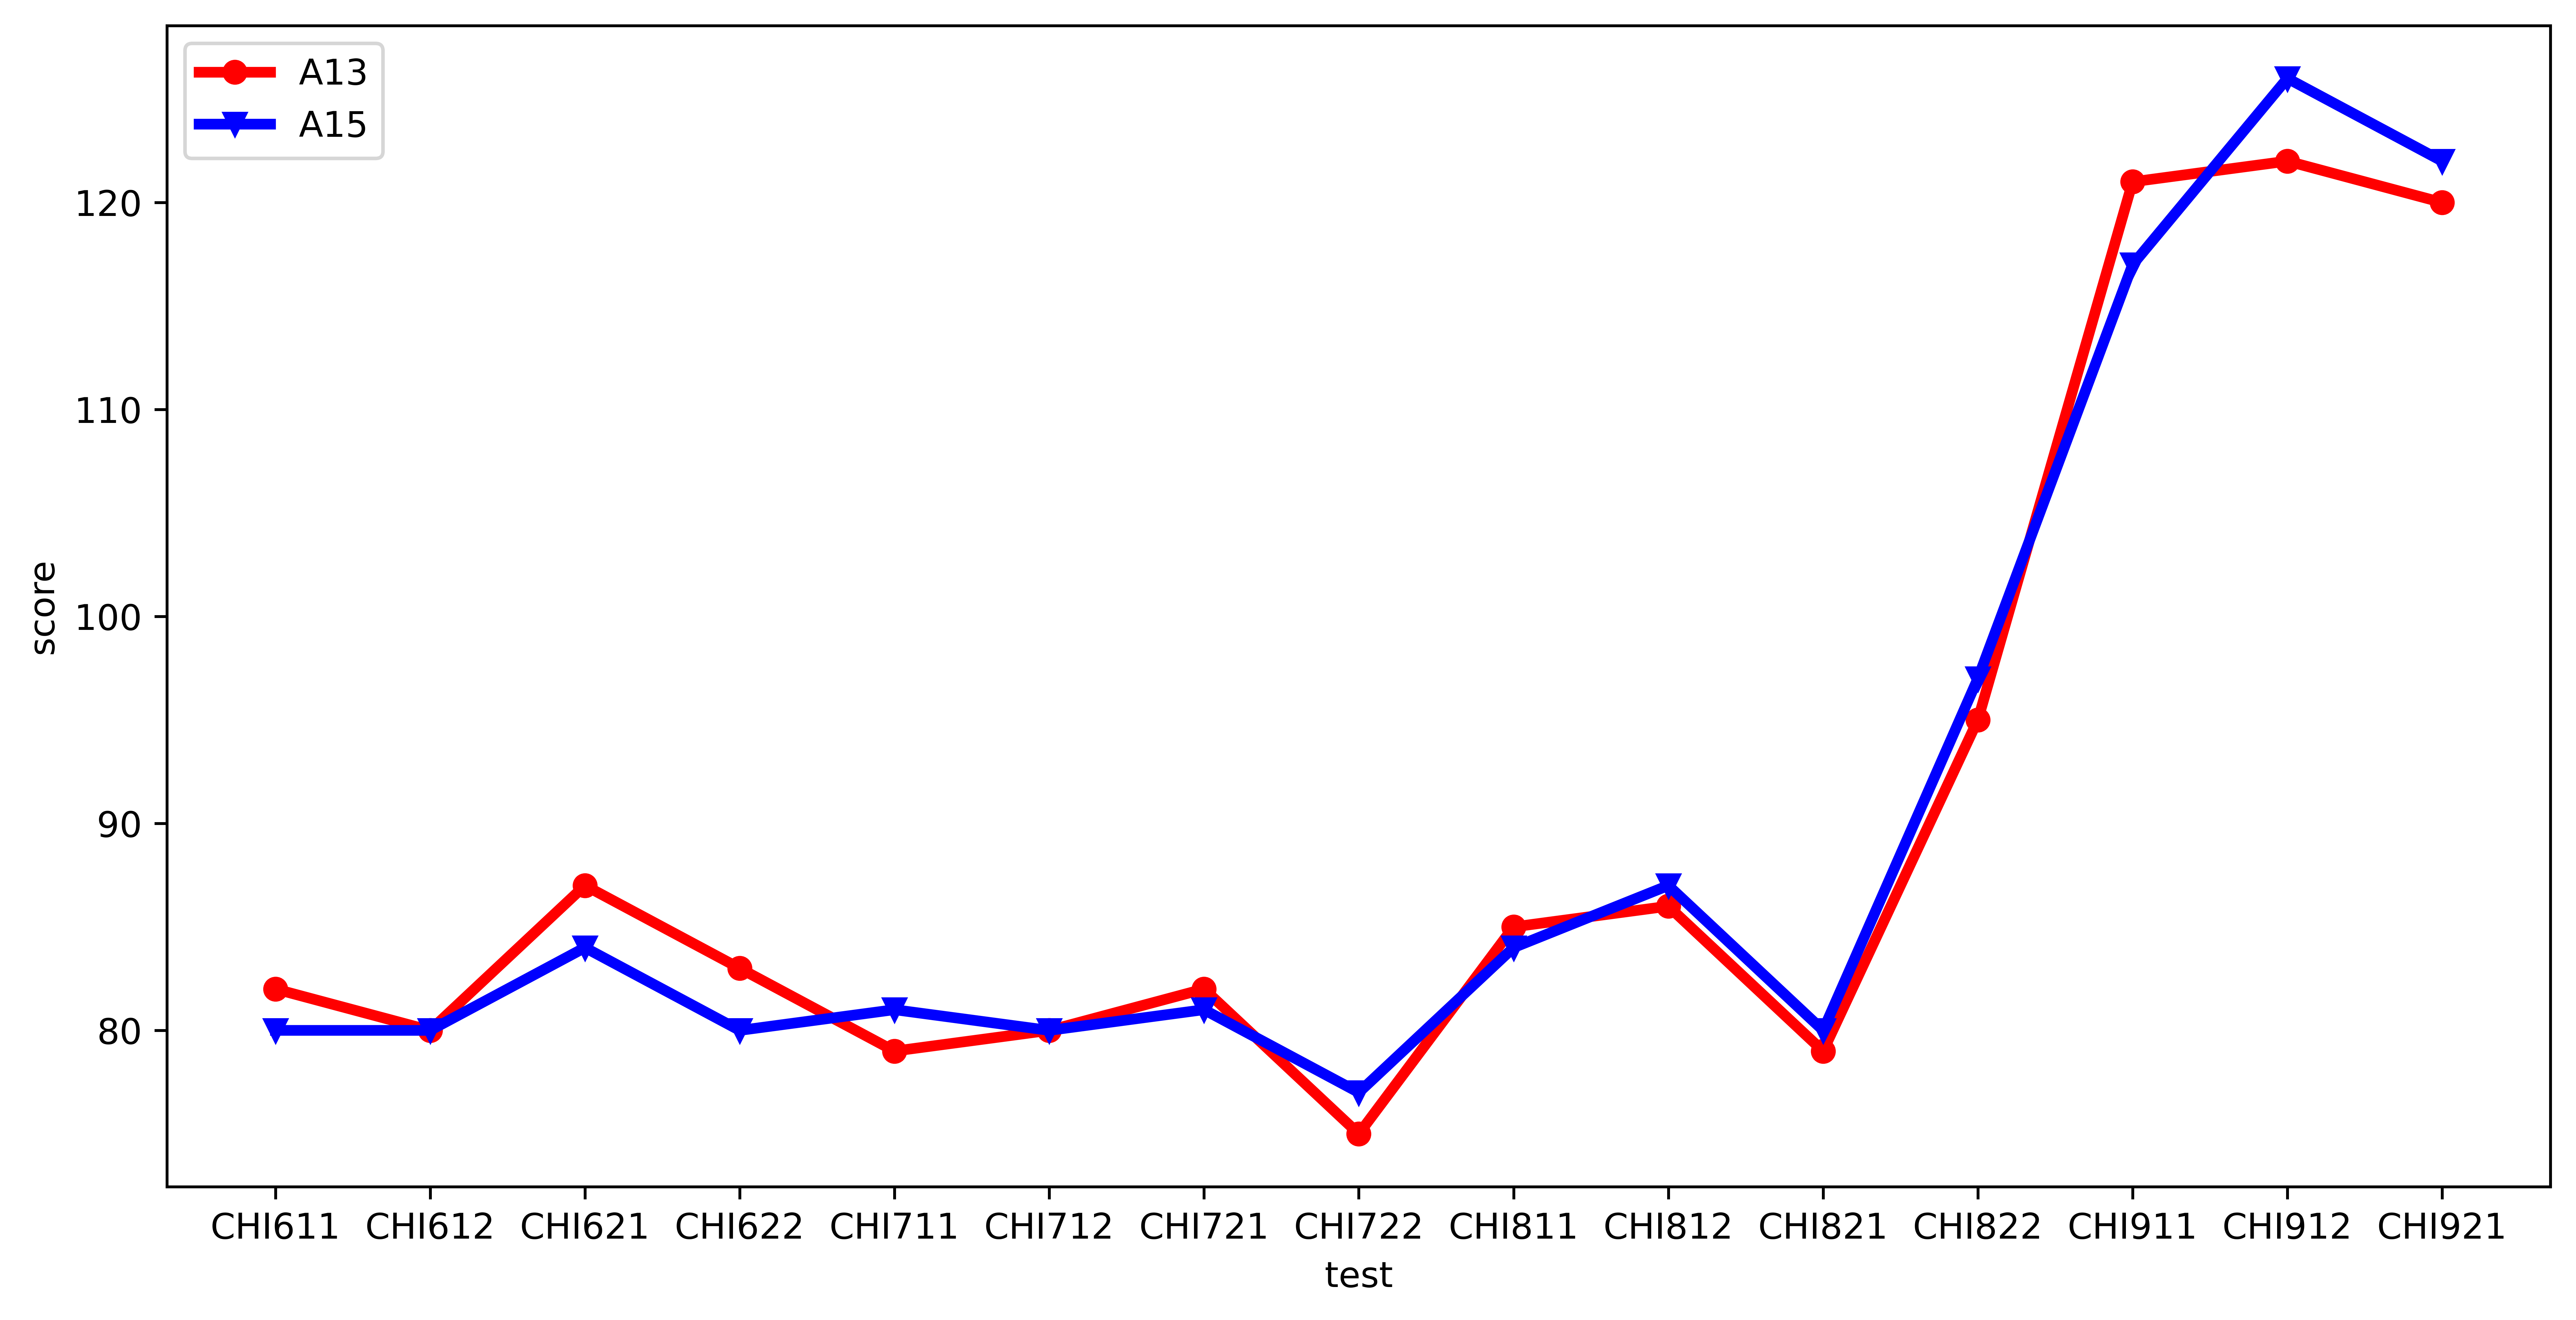

In [8]:
# 请在一张图表中分别绘制学生代码为A13和A15的学生每次语文考试成绩走势折线图
temp = np.array(data4)
A13 = temp[10, :]
A15 = temp[12, :]
a13 = []
a15 = []
t = [4,7,10,13,16,19,22,25,28,32,36,40,44,49,54]
for i in t:
    a13.append(A13[i])
    a15.append(A15[i])
test = ['CHI611','CHI612','CHI621','CHI622',
       'CHI711','CHI712','CHI721','CHI722',
       'CHI811','CHI812','CHI821','CHI822',
       'CHI911','CHI912','CHI921']
fig = plt.figure(figsize=(12, 6), dpi=800)
plt.plot(test,a13,label='A13',linewidth=3,color='r',marker='o')
plt.plot(test,a15,label='A15',linewidth=3,color='b',marker='v')
plt.xlabel('test')
plt.ylabel('score')
plt.legend()
plt.show(fig)

In [9]:
# 输出7年级第2学期期中考试中英语成绩小于60分或语文成绩小于60分的学生编号、班级、英语成绩、语文成绩
data7 = data6[['StuId', 'class', 'ENG721', 'CHI721']][(data6['CHI721'] < 60) | (data6['ENG721'] < 60)]
print(data7)

    StuId class ENG721 CHI721
48    B17     B   30.0   42.0
102   D02     D   51.0   75.0
111   D13     D   54.0   73.0
126   D29     D   54.0   76.0
138   E14     E   47.0   64.0
143   E22     E   46.0   65.0
144   E23     E   54.0   68.0
147   E26     E   26.0   53.0
149   E28     E   36.0   48.0
150   E29     E   53.0   70.0
151   E30     E   34.0   48.0
152   E31     E   56.0   76.0
156   F09     F   36.0   67.0
157   F10     F   37.0   61.0
158   F11     F   34.0   50.0
162   F18     F   53.0   58.0
163   F20     F   82.0   56.0
165   F22     F   79.0   56.0
168   F27     F   53.0   72.0
172   G08     G   53.0   63.0
176   G13     G   41.0   67.0
177   G14     G   52.0   48.0
184   G25     G   44.0   77.0
185   G26     G   76.0   35.0
187   G29     G   60.0   59.0
188   G30     G   82.0   57.0


In [10]:
# 输出A班和C班6年级第2学期期末考试中各个科目的均值和方差，然后用文字（程序注释）简要比较两个班级各科目的表现情况
#print(data6)
mean_score = data6.groupby('class').mean()
var_score = data6.groupby('class').var()

print("A班平均分：")
print("语文：", mean_score.at['A', 'CHI622'], "数学：", mean_score.at['A', 'MATH622'], "英语：", mean_score.at['A', 'ENG622'])
print("A班方差：")
print("语文：", var_score.at['A', 'CHI622'], "数学：", var_score.at['A', 'MATH622'], "英语：", var_score.at['A', 'ENG622'])

print("C班平均分：")
print("语文：", mean_score.at['C', 'CHI622'], "数学：", mean_score.at['C', 'MATH622'], "英语：", mean_score.at['C', 'ENG622'])
print("C班方差：")
print("语文：", var_score.at['C', 'CHI622'], "数学：", var_score.at['C', 'MATH622'], "英语：", var_score.at['C', 'ENG622'])

# A班平均分语文数学比C班高，英语比C班低；方差数学英语A班比C班低，同学水平更平均，语文C班方差比A班低，C班水平更平均

A班平均分：
语文： 81.40625 数学： 90.75 英语： 89.96875
A班方差：
语文： 28.700604838709676 数学： 19.93548387096774 英语： 32.16028225806452
C班平均分：
语文： 76.97142857142858 数学： 89.2 英语： 91.25714285714285
C班方差：
语文： 26.26386554621849 数学： 71.69411764705883 英语： 37.608403361344536


C:\Users\86155\AppData\Local\Temp\ipykernel_99528\318354878.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  mean_score = data6.groupby('class').mean()
C:\Users\86155\AppData\Local\Temp\ipykernel_99528\318354878.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.var is deprecated. In a future version, a TypeError will be raised. Before calling .var, select only columns which should be valid for the function.
  var_score = data6.groupby('class').var()


In [11]:
# 将任务8产生的DataFrame对象生成CSV文件，文件名为task8.csv
data7.to_csv('task8.csv', index = False)